In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = '/content/drive/MyDrive/cleaned_order_data_meriskill.csv'

df = pd.read_csv(file_path)
print("CSV file loaded successfully!")
display(df.head())

CSV file loaded successfully!


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,2020-01-01,Meta-ads,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-01,Google-ads,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.9900,2020-01-01,Google-ads,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,2020-01-01,Google-ads,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Meta-ads,Y9572700698484288,False,CREDITCARD,VISA,M


In [6]:
df = df.reset_index(drop=True)
df.index = df.index + 1
df.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
1,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,2020-01-01,Meta-ads,I4127227587819694,False,CREDITCARD,DISCOVER,M
2,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-01,Google-ads,E9525730529761877,False,CREDITCARD,MC,M
3,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.9900,2020-01-01,Google-ads,Z6376643485803420,False,CREDITCARD,VISA,M
4,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,2020-01-01,Google-ads,R8609290025411138,False,CREDITCARD,VISA,M
5,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Meta-ads,Y9572700698484288,False,CREDITCARD,VISA,M


# Profit Calculation

In [7]:
df['Profit'] = (df['ProductPrice']-df['ProductCost']) * df['OrderQuantity']
df['Profit'].head()

,Profit
1,285.9519
2,1406.9758
3,1476.8956
4,285.9519
5,1406.9758


I grouped the data by acquisition source, and also determined how many customers the different marketing campaigns acquired

In [8]:
profitability_df = df.groupby('AcquisitionSource').agg(
    Total_Profit=('Profit', 'sum'),
    Users_Acquired=('CustID', 'nunique')
).reset_index()

In [9]:
profitability_df.head()

,AcquisitionSource,Total_Profit,Users_Acquired
0,Google-ads,8.328057e+06,16658
1,Meta-ads,1.079291e+06,4731
2,Yt-Campaign,1.039928e+06,4756


In [10]:
pd.options.display.float_format = '{:,.2f}'.format
display(profitability_df)

,AcquisitionSource,Total_Profit,Users_Acquired
0,Google-ads,"8,328,057.02",16658
1,Meta-ads,"1,079,291.41",4731
2,Yt-Campaign,"1,039,928.37",4756


# Per User Profitability

In [11]:
profitability_df['Profitability_per_User'] = profitability_df['Total_Profit'] / profitability_df['Users_Acquired']
display(profitability_df)

,AcquisitionSource,Total_Profit,Users_Acquired,Profitability_per_User
0,Google-ads,"8,328,057.02",16658,499.94
1,Meta-ads,"1,079,291.41",4731,228.13
2,Yt-Campaign,"1,039,928.37",4756,218.66


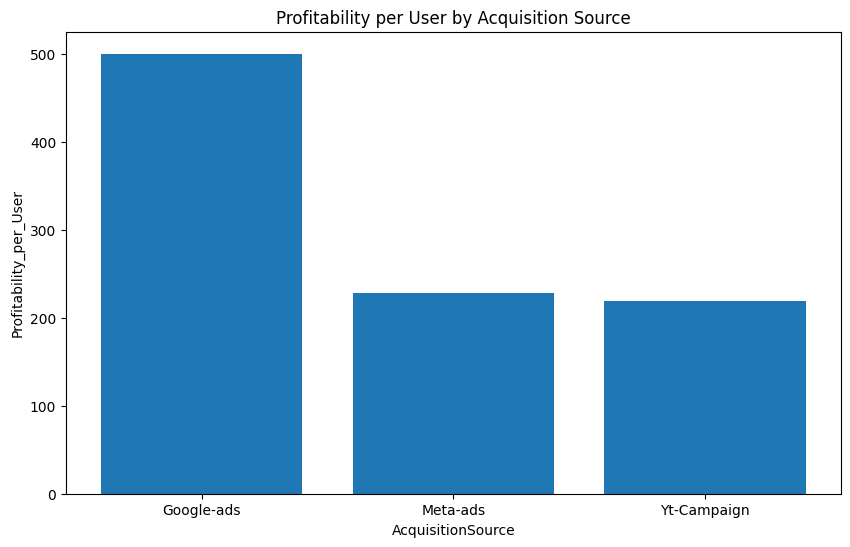

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(profitability_df['AcquisitionSource'], profitability_df['Profitability_per_User'])
plt.title('Profitability per User by Acquisition Source')
plt.xlabel('AcquisitionSource')
plt.ylabel('Profitability_per_User')
plt.show()